In [2]:
import tensorly as tl

def trivial_fun(tensor):
   """ Trivial function that takes a tensor and create a new one
         with value tensor + 2...
   """
   # context is a dict of values
   context = tl.context(tensor)
   print(context)
   # when creating a new tensor we use these as parameters
   new_tensor = tl.tensor(tensor + 2, **context)
   return new_tensor

In [5]:
import numpy as np

tensor = np.random.randn(20,10,10)
new_tensor = trivial_fun(tensor)

{'dtype': dtype('float64')}


In [6]:
import tensorly as tl
import numpy as np

tl.set_backend('pytorch') # or any other backend

tensor = tl.tensor(np.random.random((10, 10, 10)))

# This will call the correct function depending on the backend
min_value = tl.min(tensor)

unfolding = tl.unfold(tensor, mode=0)
U, S, V = tl.truncated_svd(unfolding, n_eigenvecs=5)

In [7]:
import tensorly as tl
tl.set_backend('pytorch')

In [8]:
from tensorly import random

tensor = random.random_tensor((10, 10, 10))
# tensor is a PyTorch Tensor!


In [9]:
from tensorly.decomposition import Tucker

decomp = Tucker(rank='same', init='random')
cp_tensor = decomp.fit_transform(tensor)


In [11]:
rec = cp_tensor.to_tensor()
error = tl.norm(tensor - rec)/tl.norm(tensor)

error

tensor(0.1959, dtype=torch.float64)

In [12]:
# Specify context during creation
tensor = random.random_tensor(shape=(10, 10, 10), device='cuda', dtype=tl.float32)

# Posthoc
tensor = random.random_tensor(shape=(10, 10, 10))
tensor = tensor.to('cuda')


In [13]:
decomp = Tucker(rank='same', init='random')
cp_tensor = decomp.fit_transform(tensor) # Runs on GPU!


In [14]:
tl.use_static_dispatch()

In [15]:
tl.use_dynamic_dispatch()


In [16]:
import numpy as np

In [17]:
import tensorly as tl

In [18]:
X = tl.tensor(np.arange(24).reshape((3, 4, 2)))

In [19]:
X[..., 0]

tensor([[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [16, 18, 20, 22]])

In [20]:
X[..., 1]

tensor([[ 1,  3,  5,  7],
        [ 9, 11, 13, 15],
        [17, 19, 21, 23]])

In [21]:
from tensorly import unfold

In [24]:
unfold(X, 0) # mode-1 unfolding

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23]])

In [25]:
unfold(X, 1) # mode-2 unfolding

tensor([[ 0,  1,  8,  9, 16, 17],
        [ 2,  3, 10, 11, 18, 19],
        [ 4,  5, 12, 13, 20, 21],
        [ 6,  7, 14, 15, 22, 23]])

In [26]:
unfold(X, 2) # mode-3 unfolding

tensor([[ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22],
        [ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]])

In [27]:
from tensorly import fold

In [28]:
unfolding = unfold(X, 1)

In [29]:
original_shape = X.shape

In [30]:
fold(unfolding, 1, original_shape)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11],
         [12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19],
         [20, 21],
         [22, 23]]])

### CP decomposition

In [53]:
import numpy as np
import tensorly as tl
tensor = tl.tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [47]:
from tensorly.decomposition import parafac
factors = parafac(tensor, rank=2)
print(len(factors))
print([f.shape for f in factors[1]])


2
[torch.Size([12, 2]), torch.Size([12, 2])]


In [45]:
factors[1][0].shape, factors[1][1].shape

(torch.Size([12, 2]), torch.Size([12, 2]))

In [54]:
from tensorly.decomposition import tucker
core, factors = tucker(tensor, rank=[2, 3])
# The core is a smaller tensor of size (2, 3):
print(core.shape)
print(len(factors))
print([f.shape for f in factors])

torch.Size([2, 3])
2
[torch.Size([12, 2]), torch.Size([12, 3])]


In [55]:
from tensorly import tucker_to_tensor
print(tucker_to_tensor(core, factors))

ValueError: Can only take n_mode_product with a vector or a matrix.Provided array of dimension 0 not in [1, 2].

In [58]:
from tensorly.decomposition import tensor_train
factors = tensor_train(tensor, rank=[1,2,1])
print(len(factors))
print([f.shape for f in factors])

2
[torch.Size([1, 12, 2]), torch.Size([2, 12, 1])]


In [59]:
from tensorly import tt_to_tensor
print(np.round(tt_to_tensor(factors), decimals=10))

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -5.3300e-08,  6.2550e-07,  2.4670e-07,  1.0000e+00,
          1.0000e+00,  1.0000e+00,  1.0000e+00,  1.7650e-07,  1.7650e-07,
          1.7650e-07,  0.0000e+00],
        [ 0.0000e+00,  2.3210e-07,  8.8110e-07,  5.0230e-07,  1.0000e+00,
          1.0000e+00,  1.0000e+00,  1.0000e+00,  4.3210e-07,  4.3210e-07,
          4.3210e-07,  0.0000e+00],
        [ 0.0000e+00,  3.6100e-08,  6.8510e-07,  3.0630e-07,  1.0000e+00,
          1.0000e+00,  1.0000e+00,  1.0000e+00,  2.6590e-07,  2.6590e-07,
          2.6590e-07,  0.0000e+00],
        [ 0.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
          1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,  1.0000e+00,
      

In [2]:
import numpy as np
import sparse
from tensorly.contrib.sparse import tensor, unfold
X = sparse.COO(np.arange(24).reshape((3, 4, 2)))
X = sparse.COO(X.coords, X.data, shape=(100, 100, 100))
X = tensor(X, dtype='float')
unfold(X, 0).data # mode-1 unfolding

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [3]:
import numpy as np
import sparse
from tensorly.contrib.sparse import tensor, unfold
X = sparse.COO(np.arange(24).reshape((3, 4, 2)))
X = sparse.COO(X.coords, X.data, shape=(100, 100, 100))
X = tensor(X, dtype='float')
unfold(X, 0).data # mode-1 unfolding

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23.])

In [5]:
import tensorly.contrib.sparse as stl; import sparse
shape = (1000, 1001, 1002)
rank = 5
starting_weights = stl.ones((rank))
starting_weights
starting_factors = [sparse.random((i, rank)) for i in shape]
starting_factors

[<COO: shape=(1000, 5), dtype=float64, nnz=50, fill_value=0.0>,
 <COO: shape=(1001, 5), dtype=float64, nnz=50, fill_value=0.0>,
 <COO: shape=(1002, 5), dtype=float64, nnz=50, fill_value=0.0>]

In [6]:
from tensorly.contrib.sparse.cp_tensor import cp_to_tensor
tensor = cp_to_tensor((starting_weights, starting_factors))
tensor

Format,coo
Data Type,float64
Shape,"(1000, 1001, 1002)"
nnz,4944
Density,4.929202533992953e-06
Read-only,True
Size,154.5K
Storage ratio,0.00


In [7]:
from tensorly.contrib.sparse.cp_tensor import cp_to_tensor
tensor = cp_to_tensor((starting_weights, starting_factors))
tensor

Format,coo
Data Type,float64
Shape,"(1000, 1001, 1002)"
nnz,4944
Density,4.929202533992953e-06
Read-only,True
Size,154.5K
Storage ratio,0.00


In [8]:
tensor.nbytes / 1e9 # Actual memory usage in GB
0.000161408
import numpy as np
np.prod(tensor.shape) * 8 / 1e9 # Memory usage if array was dense, in GB

8.024016

In [9]:
from tensorly.decomposition import parafac # The dense version
import time
t = time.time(); dense_cp = parafac(tensor, 5, init='random'); print(time.time() - t)

2.329724073410034


In [10]:
from tensorly.contrib.sparse.decomposition import parafac as sparse_parafac # The sparse version
t = time.time(); sparse_cp = sparse_parafac(tensor, 5, init='random'); print(time.time() - t)

2.465672016143799


/tmp/ipykernel_8813/1736853862.py:13: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = face()
/tmp/ipykernel_8813/1736853862.py:14: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = tl.tensor(zoom(face(), (0.3, 0.3, 1)), dtype="float64")


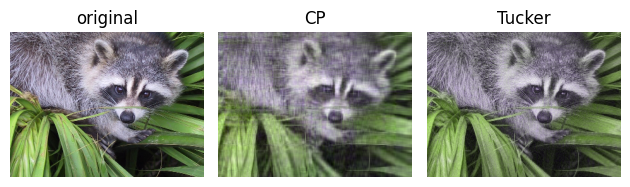

In [11]:
import matplotlib.pyplot as plt
import tensorly as tl
import numpy as np
from scipy.misc import face
from scipy.ndimage import zoom
from tensorly.decomposition import parafac
from tensorly.decomposition import tucker
from math import ceil


random_state = 12345

image = face()
image = tl.tensor(zoom(face(), (0.3, 0.3, 1)), dtype="float64")


def to_image(tensor):
    """A convenience function to convert from a float dtype back to uint8"""
    im = tl.to_numpy(tensor)
    im -= im.min()
    im /= im.max()
    im *= 255
    return im.astype(np.uint8)


# Rank of the CP decomposition
cp_rank = 25
# Rank of the Tucker decomposition
tucker_rank = [100, 100, 2]

# Perform the CP decomposition
weights, factors = parafac(image, rank=cp_rank, init="random", tol=10e-6)
# Reconstruct the image from the factors
cp_reconstruction = tl.cp_to_tensor((weights, factors))

# Tucker decomposition
core, tucker_factors = tucker(
    image, rank=tucker_rank, init="random", tol=10e-5, random_state=random_state
)
tucker_reconstruction = tl.tucker_to_tensor((core, tucker_factors))

# Plotting the original and reconstruction from the decompositions
fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
ax.set_axis_off()
ax.imshow(to_image(image))
ax.set_title("original")

ax = fig.add_subplot(1, 3, 2)
ax.set_axis_off()
ax.imshow(to_image(cp_reconstruction))
ax.set_title("CP")

ax = fig.add_subplot(1, 3, 3)
ax.set_axis_off()
ax.imshow(to_image(tucker_reconstruction))
ax.set_title("Tucker")

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorly.datasets import load_IL2data
from tensorly.decomposition import non_negative_parafac
from tensorly.cp_tensor import cp_normalize

In [2]:
response_data = load_IL2data()
IL2mutants, cells = response_data.ticks[0], response_data.ticks[3]
print(response_data.tensor.shape, response_data.dims)

(13, 4, 12, 8) ['ligands', 'times', 'doses', 'cells']


In [3]:
tensor_mask = np.isfinite(response_data.tensor)

In [4]:
response_data_fin = np.nan_to_num(response_data.tensor)

In [5]:
sig_tensor_fact = non_negative_parafac(
    response_data_fin,
    init="random",
    rank=3,
    mask=tensor_mask,
    n_iter_max=5000,
    tol=1e-9,
    random_state=1,
)
sig_tensor_fact = cp_normalize(sig_tensor_fact)

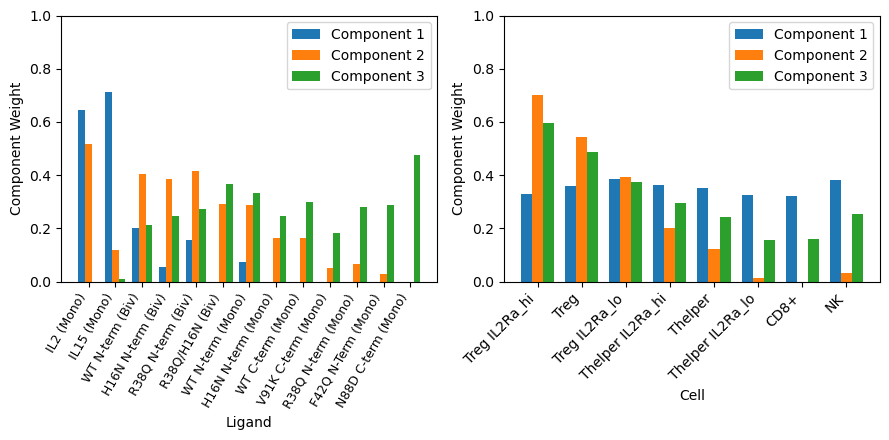

In [6]:
f, ax = plt.subplots(1, 2, figsize=(9, 4.5))

components = [1, 2, 3]
width = 0.25

lig_facs = sig_tensor_fact[1][0]
ligands = IL2mutants
x_lig = np.arange(len(ligands))

lig_rects_comp1 = ax[0].bar(x_lig - width, lig_facs[:, 0], width, label="Component 1")
lig_rects_comp2 = ax[0].bar(x_lig, lig_facs[:, 1], width, label="Component 2")
lig_rects_comp3 = ax[0].bar(x_lig + width, lig_facs[:, 2], width, label="Component 3")
ax[0].set(xlabel="Ligand", ylabel="Component Weight", ylim=(0, 1))
ax[0].set_xticks(x_lig, ligands)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60, ha="right", fontsize=9)
ax[0].legend()


cell_facs = sig_tensor_fact[1][3]
x_cell = np.arange(len(cells))

cell_rects_comp1 = ax[1].bar(
    x_cell - width, cell_facs[:, 0], width, label="Component 1"
)
cell_rects_comp2 = ax[1].bar(x_cell, cell_facs[:, 1], width, label="Component 2")
cell_rects_comp3 = ax[1].bar(
    x_cell + width, cell_facs[:, 2], width, label="Component 3"
)
ax[1].set(xlabel="Cell", ylabel="Component Weight", ylim=(0, 1))
ax[1].set_xticks(x_cell, cells)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")
ax[1].legend()

f.tight_layout()
plt.show()

In [7]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from tensorly.datasets.data_imports import load_covid19_serology
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable

data = load_covid19_serology()


In [8]:
comps = np.arange(1, 7)
CMTFfacs = [
    parafac(
        data.tensor, cc, tol=1e-10, n_iter_max=1000, linesearch=True, orthogonalise=2
    )
    for cc in comps
]

(0.0, 1.0)

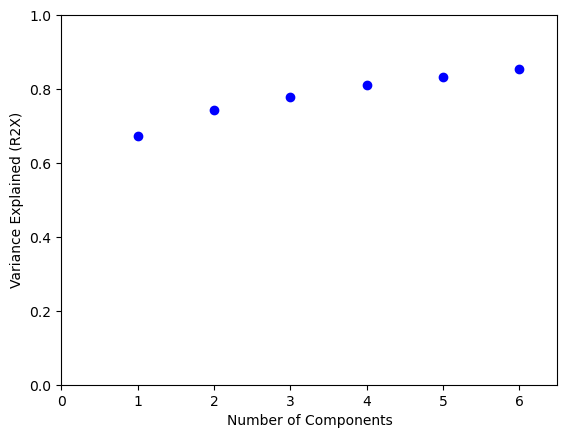

In [9]:
def reconstructed_variance(tFac, tIn=None):
    """This function calculates the amount of variance captured (R2X) by the tensor method."""
    tMask = np.isfinite(tIn)
    vTop = np.sum(np.square(tl.cp_to_tensor(tFac) * tMask - np.nan_to_num(tIn)))
    vBottom = np.sum(np.square(np.nan_to_num(tIn)))
    return 1.0 - vTop / vBottom


fig1 = plt.figure()
CMTFR2X = np.array([reconstructed_variance(f, data.tensor) for f in CMTFfacs])
plt.plot(comps, CMTFR2X, "bo")
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained (R2X)")
plt.gca().set_xlim([0.0, np.amax(comps) + 0.5])
plt.gca().set_ylim([0, 1])

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

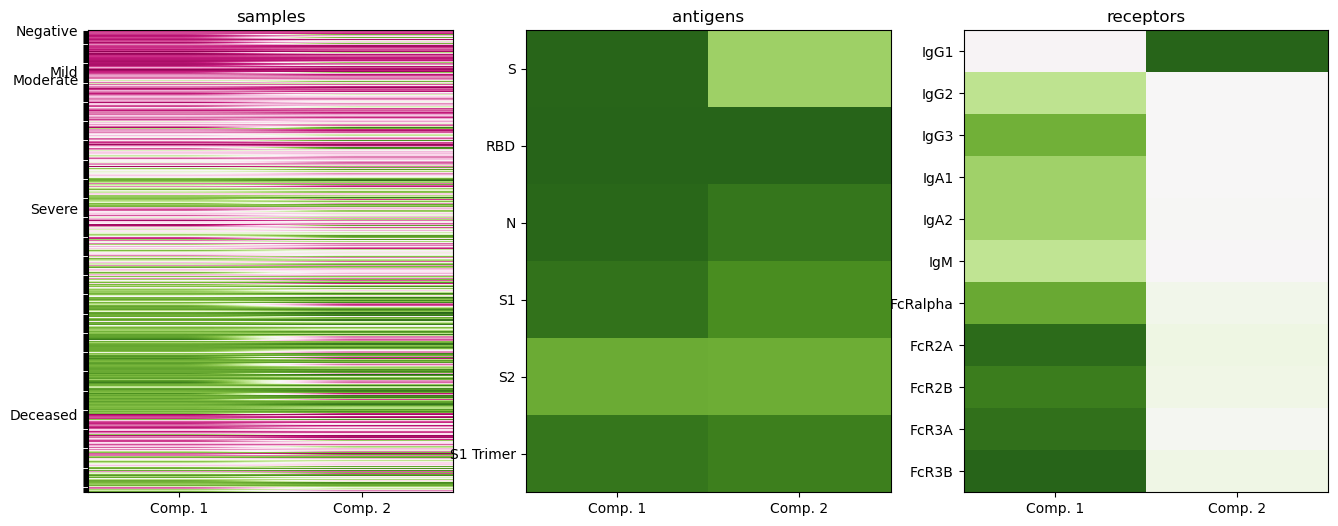

In [10]:
tfac = CMTFfacs[1]

# Ensure that factors are negative on at most one direction.
tfac.factors[1][:, 0] *= -1
tfac.factors[2][:, 0] *= -1

fig2, ax = plt.subplots(1, 3, figsize=(16, 6))
for ii in [0, 1, 2]:
    fac = tfac.factors[ii]
    scales = np.linalg.norm(fac, ord=np.inf, axis=0)
    fac /= scales

    ax[ii].imshow(fac, cmap="PiYG", vmin=-1, vmax=1)
    ax[ii].set_xticks([0, 1])
    ax[ii].set_xticklabels(["Comp. 1", "Comp. 2"])
    ax[ii].set_yticks(range(len(data.ticks[ii])))
    if ii == 0:
        ax[0].set_yticklabels(
            [
                (
                    data.ticks[0][i]
                    if i == 0 or data.ticks[0][i] != data.ticks[0][i - 1]
                    else ""
                )
                for i in range(len(data.ticks[0]))
            ]
        )
    else:
        ax[ii].set_yticklabels(data.ticks[ii])
    ax[ii].set_title(data.dims[ii])
    ax[ii].set_aspect("auto")

fig2.colorbar(ScalarMappable(norm=plt.Normalize(-1, 1), cmap="PiYG"))